In [59]:
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
import pandas as pd

## Running Moment to Moment Labeling System on a Directory of WAV Files 

In [60]:
path = "./TEST/"

### Dictionary that defines the isolation technique and parameters used to generate automated labels 

In [61]:
isolation_parameters = {
    "technique" : "steinberg",
    "threshold_type" : "median",
    "threshold_const" : 2.0,
    "threshold_min" : 0.0,
    "window_size" : 2.0,
    "chunk_size" : 5.0
}

In [77]:
automated_df = generate_automated_labels(path,isolation_parameters, ml_model="tweetynet", normalize_local_scores=True); #make this function work with tweetynet


1118
129
946


### Pandas Ouput of Automated Labeling 

In [63]:
automated_df

,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,OFFSET,DURATION,MANUAL ID
0,./TEST/,Accipiter-collaris-260336.wav,0,26.932245,44100,0.0,26.932245,bird
1,./TEST/,Accipiter-striatus-497793.wav,0,3.720000,44100,0.0,3.720000,bird
2,./TEST/,Actitis-macularius-257519.wav,0,22.177959,44100,0.0,22.177959,bird


### Function that gathers statistics about the duration of annotations

In [64]:
annotation_duration_statistics(automated_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,3,3.72,17.610068,10.011703,3.72,12.94898,22.177959,24.555102,26.932245


### Human Manual Labels for Comparison 

In [65]:
manual_df = pd.read_csv("ScreamingPiha_Manual_Labels.csv")
#manual_df = pd.read_csv("BirdCLEF2020_Validation.csv")
manual_df

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLING RATE,MANUAL ID
0,./TEST/,ScreamingPiha1.wav,32.6160,0,1.5448,2.1297,16000,bird
1,./TEST/,ScreamingPiha1.wav,32.6160,0,10.1638,0.8498,16000,bird
2,./TEST/,ScreamingPiha1.wav,32.6160,0,0.5549,0.9999,16000,bird
3,./TEST/,ScreamingPiha1.wav,32.6160,0,8.7739,0.8399,16000,bird
4,./TEST/,ScreamingPiha1.wav,32.6160,0,12.6335,1.9997,16000,bird
...,...,...,...,...,...,...,...,...
249,./TEST/,ScreamingPiha2.wav,33.9331,0,26.9274,1.7602,44100,bird
250,./TEST/,ScreamingPiha2.wav,33.9331,0,30.8178,0.7200,44100,bird
251,./TEST/,ScreamingPiha2.wav,33.9331,0,29.8677,0.9401,44100,bird
252,./TEST/,ScreamingPiha2.wav,33.9331,0,31.5378,1.9502,44100,bird


In [66]:
annotation_duration_statistics(manual_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,254,1.87,1.068224,0.664488,0.11,0.532475,0.78005,1.767475,3.1199


### Histogram Visualization of Annotation Lengths

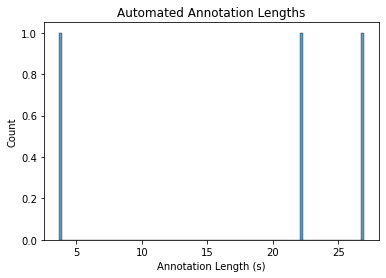

In [67]:
annotation_duration_histogram(automated_df, n_bins = 100, title = "Automated Annotation Lengths")

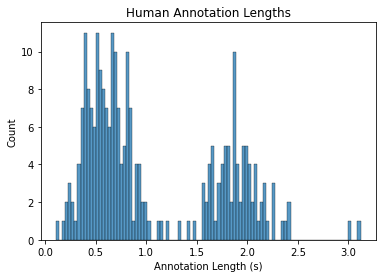

In [68]:
annotation_duration_histogram(manual_df, n_bins = 100, title = "Human Annotation Lengths")
# In the Screaming Piha clips we can see two distinct clusters based on the "Whoa" vocalizations (.25-1.25s)
# and the "Pee-Haw" vocalizations (1.25-2.5s)

### Helper function to convert to kaleidoscope-compatible format 

In [69]:
kaleidoscope_conversion(manual_df)

,FOLDER,IN FILE,CHANNEL,OFFSET,DURATION,MANUAL ID
0,./TEST,ScreamingPiha1.wav,0,1.5448,2.1297,bird
1,./TEST,ScreamingPiha1.wav,0,10.1638,0.8498,bird
2,./TEST,ScreamingPiha1.wav,0,0.5549,0.9999,bird
3,./TEST,ScreamingPiha1.wav,0,8.7739,0.8399,bird
4,./TEST,ScreamingPiha1.wav,0,12.6335,1.9997,bird
...,...,...,...,...,...,...
249,./TEST,ScreamingPiha2.wav,0,26.9274,1.7602,bird
250,./TEST,ScreamingPiha2.wav,0,30.8178,0.7200,bird
251,./TEST,ScreamingPiha2.wav,0,29.8677,0.9401,bird
252,./TEST,ScreamingPiha2.wav,0,31.5378,1.9502,bird


## Different Combinations of Local Score Visualization Graphs

### Baseline Graph without any annotations

In [70]:
clip_path = "./TEST/ScreamingPiha2.wav"
local_score_visualization(clip_path)

Failure in loading ./TEST/ScreamingPiha2.wav


### Baseline graph with log scale

In [71]:
local_score_visualization(clip_path,log_scale = True)

Failure in loading ./TEST/ScreamingPiha2.wav


### Baseline graph with normalized local score values between [0,1] 

In [72]:
local_score_visualization(clip_path, normalize_local_scores = True)

Failure in loading ./TEST/ScreamingPiha2.wav


### Graph with Automated Labeling 

In [73]:
local_score_visualization(clip_path,automated_df = True, isolation_parameters = isolation_parameters)

Failure in loading ./TEST/ScreamingPiha2.wav


### Graph with Human Labelling

In [74]:
local_score_visualization(clip_path, premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"],premade_annotations_label = "Piha Human Labels")

Failure in loading ./TEST/ScreamingPiha2.wav


### Graph with Both Automated and Human Labels 
    Orange ==> True Positive
    Red ==> False Negative
    Yellow ==> False Positive
    White ==> True Negative

In [75]:
local_score_visualization(clip_path,automated_df = True,isolation_parameters=isolation_parameters,premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"])

Failure in loading ./TEST/ScreamingPiha2.wav


### Another Visualization of True Positives, False Positives, False Negatives, and True Negatives 

In [76]:
automated_piha_df = automated_df[automated_df["IN FILE"] == "ScreamingPiha2.wav"]
manual_piha_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"]
piha_stats = plot_bird_label_scores(automated_piha_df,manual_piha_df)

IndexError: list index out of range

### Function that generates statistics to gauge efficacy of automated labeling compared to human labels 

In [ ]:
statistics_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "general");
statistics_df

### Function that takes the statistical ouput of all of the clips and gets the equivalent global scores 

In [ ]:
global_dataset_statistics(statistics_df)

### Function that takes in the manual and automated labels for a clip and outputs human label-by-label IoU Scores. Used to derive statistics that measure how well a system is isolating desired segments of audio clips

In [ ]:
Intersection_over_Union_Matrix = clip_IoU(automated_piha_df,manual_piha_df)
print(Intersection_over_Union_Matrix)

### Function that turns the IoU Matrix of a clip into true positive and false positives values, as well as computing the precision, recall, and F1 statistics

In [ ]:
matrix_IoU_Scores(Intersection_over_Union_Matrix,manual_piha_df,0.5)

### Wrapper function that takes matrix_IoU_Scores across multiple clips. Allows user to modify the threshold that determines whether or not a label is a true positive.

In [ ]:
stats_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "IoU",threshold = 0.5)
stats_df

### Function that takes the output of dataset_IoU Statistics and ouputs a global count of true positives and false positives, as well as computing common metrics across the dataset

In [ ]:
global_stats_df = global_IoU_Statistics(stats_df)
global_stats_df